# Plantilla para ejercicios de Euler-Lagrange

[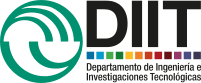](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2024 [Mariano Real](mailto:mreal@unlam.edu.ar) | [Víctor Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

Este cuaderno es una plantilla.
La idea de este es que sirva de modelo cada vez que se empieza un ejercicio nuevo:
1. "Guardar una copia en Drive" está en el menú Archivo
2. "Renombrar", también en ese menú, para escribir: "nombre del ejercicio - Apellido"

Todo lo siguiente se vio en cuadernos previos.
Si algo no se entiende, vuelva a leer el correspondiente cuaderno.
Allí figura más información y está mejor explicada.

## Carga de los módulos de Python necesarios

In [1]:
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

## Definición del sistema

Se definen los parámetros físicos del sistema, los que no varían con el tiempo.

In [2]:
m1, m2, g, l1, l2 = sm.symbols('m_1, m_2, g, \ell_1, \ell_2', positive=True) # parámetros del sistema. \ell es la cursiva de ele.
t = sm.Symbol('t') # declarada aparte para no imponer que sea siempre positiva

Y las coordenadas generalizadas.

In [3]:
e = me.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
phi1, phi2 = me.dynamicsymbols(r'\varphi_1, \varphi_2') # variables que cambiaran con el tiempo, por tanto son variables dinámicas
# el r es para que el sistema considere el backslash \ como string

Luego con estas coordenadas se describen las posiciones de las partículas.

In [4]:
partícula1_r = l1*( sm.cos(phi1)* e.x + sm.sin(phi1)* e.y )
partícula2_r = partícula1_r + l2*( sm.cos(phi2)* e.x + sm.sin(phi2)* e.y )
partícula1_r, partícula2_r

## Energía cinética de traslación

In [5]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [6]:
# Energía cinética del sistema
partícula1_T = energíaCinéticaTraslación(m1, partícula1_r, e)
partícula2_T = energíaCinéticaTraslación(m2, partícula2_r, e)
T = sm.Eq(
  partícula1_T.lhs,
  partícula1_T.rhs + partícula2_T.rhs
  ).simplify()
# sm.Eq(lado iz, lado derecho)
# simplify: simplifica usando factor común y otras operaciones
T

## Energía Potencial gravitatoria

In [7]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [8]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
partícula1_V = energíaPotencialGravitatoria(m1, partícula1_r, g_vector)
partícula2_V = energíaPotencialGravitatoria(m2, partícula2_r, g_vector)
V = sm.Eq(
  partícula1_V.lhs,
  partícula1_V.rhs + partícula2_V.rhs
  ).simplify()
V

## Ecuaciones de Euler-Lagrange

Como hicimos anteriormente para las energías podemos ahorrar esfuerzo y escribir una sola vez en una función el procedimiento para obtener la ecuación de Euler-Lagrange.

Recuerde que habrá tantas ecuaciones como coordenadas generalizadas se utilicen para describir el sistema mecánico.

In [9]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sm.Eq(
        lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        - lagrangiano.diff(coordenadaGeneralizada) 
        , 0
    ).simplify()

In [10]:
phi1_EL = eulerLagrange(T, V, phi1)
phi1_EL

In [11]:
phi2_EL = eulerLagrange(T, V, phi2)
phi2_EL